<a href="https://colab.research.google.com/github/igorvojnyak/datavojnyak.github.io/blob/master/Data_Sc_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
#from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from datetime import date, timedelta
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd 

In [0]:
# Read in data into a dataframe
train_features = pd.read_csv("train_priceSale.csv",comment='#')

In [3]:
# Display dataframe
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
# Replace all occurrences of Not Available with numpy not a number
train_features = train_features.replace({'Not Available': np.nan})

In [0]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values %.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(train_features).head(15)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values %.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [7]:
# # Get the columns with > 60% missing
missing_df = missing_values_table(train_features.drop(columns='SalePrice', axis=1));
missing_columns = list(missing_df[missing_df['% of Total Values'] > 60].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 80 columns.
There are 19 columns that have missing values %.
We will remove 5 columns.


In [0]:
# Drop the columns with > 60% missing
train_features = train_features.drop(columns = list(missing_columns))

In [9]:
train_features.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

Text(0.5, 1.0, 'TotRmsAbvGrd - Price scatter plot')

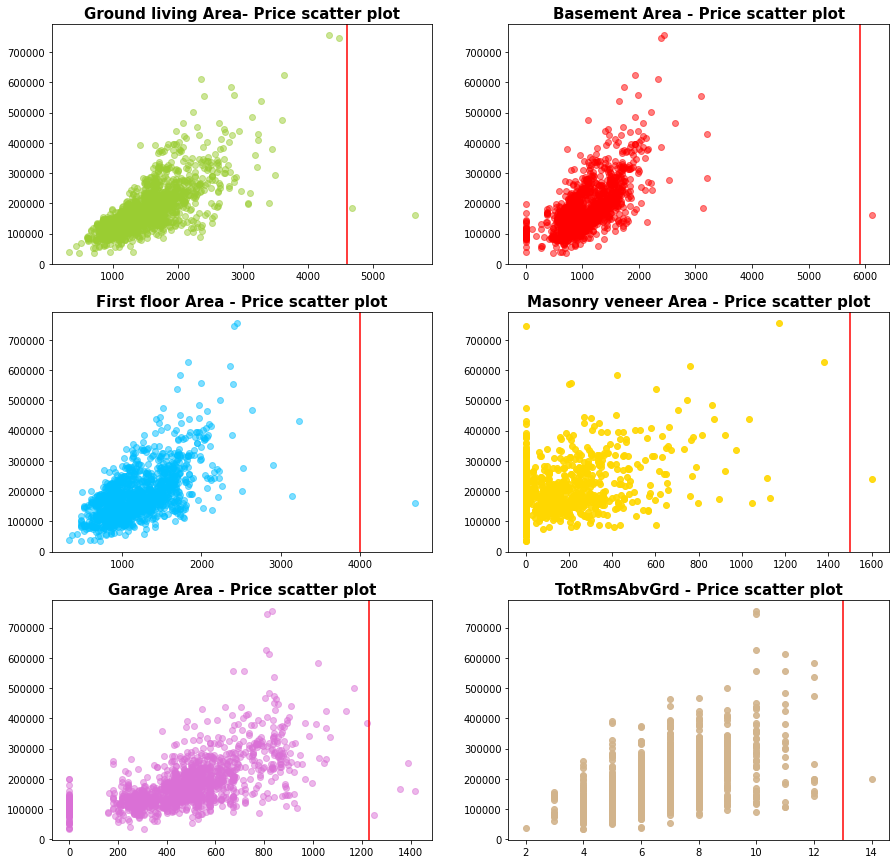

In [10]:
#Dealing with outliers
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=train_features['GrLivArea'], y=train_features['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=train_features['TotalBsmtSF'], y=train_features['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=train_features['1stFlrSF'], y=train_features['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=train_features['MasVnrArea'], y=train_features['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=train_features['GarageArea'], y=train_features['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=train_features['TotRmsAbvGrd'], y=train_features['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )

In [0]:
# Calculate first and third quartile
Q1 = train_features.quantile(0.25)
Q3 = train_features.quantile(0.75)
IQR = Q3 - Q1
# Remove outliers
train_features = train_features[(train_features[:] > (Q1-3*IQR)) &
                                (train_features[(train_features[:] < (Q3+3*IQR))])]

In [12]:
train_features['SalePrice'].describe()

count      1448.000000
mean     177657.070442
std       70678.078392
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212925.000000
max      465000.000000
Name: SalePrice, dtype: float64

In [0]:
numeric_subset = train_features.select_dtypes('number')
categorical_subset = train_features[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']]
categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

In [0]:
# select only numeric features
num=features.select_dtypes(exclude='object')

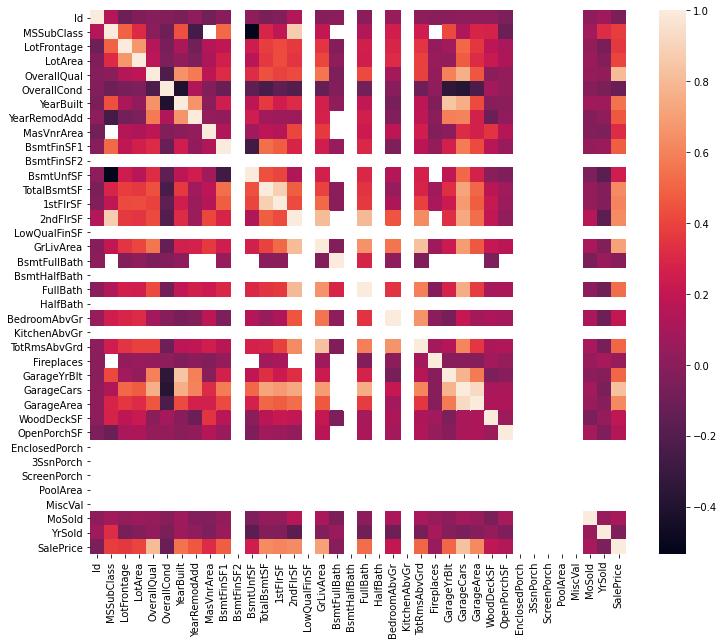

In [15]:
# correlations between features
transformed_corr = num.corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr)

In [0]:
corr_matrix =(features.drop(columns = ['SalePrice'])).corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [17]:
to_drop

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [18]:
# removing columns with correlation greater than 0.6
features=features.drop(features[to_drop], axis=1)
features.shape

(1460, 27)

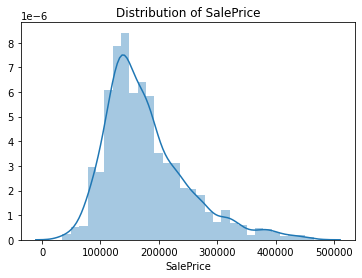

In [19]:
# Distribution of SalePrice
target = (features['SalePrice'].fillna(method = 'ffill'))
plt.figure()
sns.distplot(target)
plt.title('Distribution of SalePrice')
plt.show()

In [0]:
# log transformation SalePrice
features['SalePrice'] = np.log1p(features['SalePrice'])
features = features.rename(columns={'SalePrice': 'SalePrice_log'})

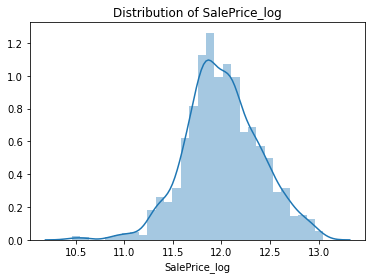

In [21]:
# skew and Distribution log transformation SalePrice
target = (features['SalePrice_log'].fillna(method = 'ffill'))
plt.figure()
sns.distplot(target)
plt.title('Distribution of SalePrice_log')
plt.show()

In [22]:
print('median_house_value has a skew of ' + str(target.skew().round(decimals=2)) + 
      ' while the log-transformed improves the skew to ' + 
      str(np.log(target).skew().round(decimals=2)))

median_house_value has a skew of -0.06 while the log-transformed improves the skew to -0.18


In [0]:
#Split into training and testing sets
X = features.drop(columns='SalePrice_log', axis=1)

# Create target object and call it y
y =pd.DataFrame(features['SalePrice_log'].fillna(method = 'ffill'))

# One-hot-encoding to transform all categorical data
X = pd.get_dummies(X)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [24]:
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)

(1095, 26)
(365, 26)
(1095, 1)
(365, 1)


In [0]:
# Final imputation of missing data with median 
my_imputer = SimpleImputer(strategy='median')
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

In [26]:
print('Missing values in training features: ', np.sum(np.isnan(train_X)))
print('Missing values in testing features:  ', np.sum(np.isnan(val_X)))

Missing values in training features:  0
Missing values in testing features:   0


In [27]:
train_y.isnull().sum()

SalePrice_log    0
dtype: int64

In [28]:
# Make sure all values are finite
print(np.where(~np.isfinite(train_X)))
print(np.where(~np.isfinite(val_X)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [29]:
def inv_y(transformed_y):
    return np.exp(transformed_y)
#Models to Evaluate
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

# Fit Model
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
mae_compare['DecisionTree'] = val_mae


# Decision Tree. Using best value for max_leaf_nodes 
iowa_model = DecisionTreeRegressor(max_leaf_nodes=90, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
mae_compare['DecisionTree_opt_max_leaf_nodes'] = val_mae


# Random Forest. Define the model
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(val_y))
mae_compare['RandomForest'] = rf_val_mae


# XGBoost. Define the model
xgb_model = XGBRegressor()
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
              eval_set=[(val_X,val_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_predictions), inv_y(val_y))
mae_compare['XGBoost'] = xgb_val_mae


# Linear Regression
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(val_y))
mae_compare['LinearRegression'] = linear_val_mae


#KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(train_X, train_y)
knn_val_predictions = knn_model.predict(val_X)
knn_val_mae = mean_absolute_error(inv_y(knn_val_predictions), inv_y(val_y))
mae_compare['KNeighborsRegressor'] = knn_val_mae
# print("Validation MAE for KNn Model: {:,.0f}".format(knn_val_mae))

# Lasso 
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))
mae_compare['Lasso'] = lasso_val_mae


# Ridge
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(val_X)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_predictions), inv_y(val_y))
mae_compare['Ridge'] = ridge_val_mae


# ElasticNet
elastic_net_model = ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)
elastic_net_model.fit(train_X, train_y)
elastic_net_val_predictions = elastic_net_model.predict(val_X)
elastic_net_val_mae = mean_absolute_error(inv_y(elastic_net_val_predictions), inv_y(val_y))
mae_compare['ElasticNet'] = elastic_net_val_mae


# Gradient Boosting Regression 
gbr_model = GradientBoostingRegressor(random_state=60)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))
mae_compare['GradientBoosting'] = gbr_val_mae


# # Ada Boost Regression 
ada_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=5)
ada_model.fit(train_X, train_y)
ada_val_predictions = ada_model.predict(val_X)
ada_val_mae = mean_absolute_error(inv_y(ada_val_predictions), inv_y(val_y))
mae_compare['AdaBoost'] = ada_val_mae
)

# # Support Vector Regression 
svr_model = SVR(kernel='linear')
svr_model.fit(train_X, train_y)
svr_val_predictions = svr_model.predict(val_X)
svr_val_mae = mean_absolute_error(inv_y(svr_val_predictions), inv_y(val_y))
mae_compare['SVR'] = svr_val_mae

# # Make validation predictions and calculate mean absolute error
print('MAE:')
mae_compare.sort_values(ascending=True).round()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[21:18:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE values for different algorithms:


Algorithm
GradientBoosting                   2.900700e+04
XGBoost                            2.917500e+04
RandomForest                       2.954500e+04
DecisionTree_opt_max_leaf_nodes    3.457700e+04
Lasso                              3.467500e+04
Ridge                              3.474300e+04
LinearRegression                   3.474300e+04
ElasticNet                         3.504300e+04
AdaBoost                           3.533100e+04
DecisionTree                       4.002500e+04
KNeighborsRegressor                4.114000e+04
SVR                                2.257053e+37
dtype: float64

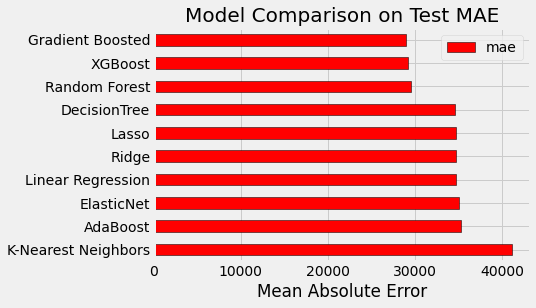

In [30]:
#model comparison
plt.style.use('fivethirtyeight')


# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','Lasso','Ridge','ElasticNet','AdaBoost','XGBoost','DecisionTree'],
                                 'mae': [linear_val_mae, rf_val_mae, 
                                         gbr_val_mae, knn_val_mae, lasso_val_mae, ridge_val_mae, elastic_net_val_mae, ada_val_mae, xgb_val_mae, val_mae ]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

In [0]:
#choosing the best model
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]


# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [0]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state=42)
random_cv = RandomizedSearchCV(estimator = model,
                              param_distributions = hyperparameter_grid,
                              scoring = 'neg_mean_absolute_error',
                              n_jobs = -1, verbose = 1,
                              return_train_score = True,
                              random_state=42)

In [0]:
# Final imputation of missing data 
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)



In [34]:
random_cv.fit(imputed_X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

In [35]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,19.472522,0.290194,0.028464,0.001430,900,6,6,sqrt,15,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-0.152798,-0.157856,-0.152858,-0.137696,-0.146394,-0.149520,0.006942,1,-0.026912,-0.023459,-0.024225,-0.025767,-0.024039,-0.024880,0.001270
5,4.224195,0.044144,0.010726,0.000090,900,6,8,log2,5,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-0.154908,-0.155665,-0.151959,-0.140169,-0.145591,-0.149658,0.005925,2,-0.075022,-0.070714,-0.074354,-0.074544,-0.072680,-0.073463,0.001585
1,1.748209,0.239728,0.004089,0.000052,100,6,8,sqrt,10,huber,"{'n_estimators': 100, 'min_samples_split': 6, ...",-0.152748,-0.161291,-0.154488,-0.144488,-0.144036,-0.151410,0.006499,3,-0.056924,-0.052394,-0.052917,-0.054776,-0.057031,-0.054808,0.001940
0,0.495830,0.005077,0.003000,0.000096,100,2,6,auto,5,ls,"{'n_estimators': 100, 'min_samples_split': 2, ...",-0.158599,-0.161126,-0.151361,-0.142926,-0.153505,-0.153504,0.006333,4,-0.084159,-0.082910,-0.084430,-0.086364,-0.089956,-0.085564,0.002459
8,13.858732,0.334481,0.016159,0.000436,1500,6,2,sqrt,10,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-0.155905,-0.162616,-0.155630,-0.145532,-0.150404,-0.154017,0.005747,5,-0.003640,-0.004269,-0.003859,-0.004117,-0.004097,-0.003996,0.000221
6,11.806422,0.336429,0.011598,0.000294,1500,6,2,sqrt,15,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-0.157494,-0.166015,-0.153204,-0.145574,-0.153705,-0.155198,0.006650,6,-0.002359,-0.002917,-0.001993,-0.002510,-0.002522,-0.002460,0.000298
9,2.744243,0.082426,0.004578,0.000692,500,4,2,auto,3,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-0.164394,-0.157196,-0.154693,-0.147873,-0.152225,-0.155276,0.005500,7,-0.072223,-0.070269,-0.072280,-0.074648,-0.075280,-0.072940,0.001815
3,4.497003,0.029021,0.006711,0.000134,500,6,8,None,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.159986,-0.161132,-0.156270,-0.145058,-0.157133,-0.155916,0.005715,8,-0.040758,-0.037595,-0.041862,-0.042764,-0.042820,-0.041160,0.001933
7,1.561758,0.012707,0.004987,0.000170,500,4,6,auto,3,ls,"{'n_estimators': 500, 'min_samples_split': 4, ...",-0.164814,-0.165004,-0.153792,-0.152693,-0.156633,-0.158587,0.005320,9,-0.077569,-0.076092,-0.077159,-0.080356,-0.078615,-0.077958,0.001446
2,10.546180,0.515409,0.009285,0.000591,500,4,2,auto,10,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-0.174313,-0.170919,-0.165718,-0.149301,-0.167616,-0.165574,0.008648,10,-0.003009,-0.002925,-0.002425,-0.002300,-0.002368,-0.002605,0.000299


In [36]:
#best parametrs for model
random_cv.best_estimator_


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad',
                          max_depth=15, max_features='sqrt',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=6,
                          min_samples_split=6, min_weight_fraction_leaf=0.0,
                          n_estimators=900, n_iter_no_change=None,
                          presort='deprecated', random_state=42, subsample=1.0,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)

In [0]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [38]:
grid_search.fit(imputed_X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='lad', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [40]:
# Default model
default_model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
%%timeit -n 1 -r 5
default_model.fit(imputed_X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

1 loop, best of 5: 4.74 s per loop


In [43]:
%%timeit -n 1 -r 5
final_model.fit(imputed_X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

1 loop, best of 5: 2.99 s per loop


In [44]:
default_pred = default_model.predict(val_X)
final_pred = final_model.predict(val_X)

print('Default model performance on the test set: MAE = %0.4f.' % mean_absolute_error(val_y, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mean_absolute_error(val_y, final_pred))

Default model performance on the test set: MAE = 0.1800.
Final model performance on the test set:   MAE = 0.1816.


In [45]:
n_folds = 10
scores = cross_val_score(gbr_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
gbr_mae_scores = np.sqrt(-scores)
print('For Gradient Boosting model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(gbr_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(gbr_mae_scores.std().round(decimals=3)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

For Gradient Boosting model:
Mean RMSE = 0.209
Error std deviation = 0.016


In [46]:
# Gradient Boosting Regression 
gbr_model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad',
                          max_depth=15, max_features='sqrt',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=6,
                          min_samples_split=6, min_weight_fraction_leaf=0.0,
                          n_estimators=900, n_iter_no_change=None,
                          presort='deprecated', random_state=42, subsample=1.0,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))
mae_compare['GradientBoosting'] = gbr_val_mae
print("Validation MAE for Gradient Boosting Model: {:,.0f}".format(gbr_val_mae))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation MAE for Gradient Boosting Model: 28,007


In [0]:
r2 = gbr_model.score(val_X, val_y)
RMSLE = np.sqrt(mean_squared_log_error(val_y, gbr_val_predictions))
RMSE = np.sqrt(mean_squared_error(val_y, gbr_val_predictions))

In [48]:
print()
print("Results from local train-test split:")
print("r^2: {}.".format(r2))
print("RMSLE: {}.".format(RMSLE))
print("RMSE: {}.".format(RMSE))
print()


Results from local train-test split:
r^2: 0.6749635227995026.
RMSLE: 0.01725349739575522.
RMSE: 0.2233350203396959.

